## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#загрузка данных
data = pd.read_csv('solarpower.zip')

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} - x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [5]:
for i in range(len(data['cum_power'])-1):
        if data['cum_power'].loc[i] == -1:
            data['cum_power'].loc[i] = (data['cum_power'].loc[i-1]+data['cum_power'].loc[i+1])/2
        else:
            data['cum_power'].loc[i] = data['cum_power'].loc[i]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [7]:
#создаем столбец day_power
data['day_power'] = data['cum_power'].diff()

#создаем датасет monthly_power, в котором содержится информация о ежемесячной выработке энергии на каждый год 
data['date'] = pd.to_datetime(data['date']) 
data['period'] = data['date'].dt.to_period("M")
monthly_power = data.groupby('period',as_index=False)[['day_power']].sum()
monthly_power['period'] = monthly_power['period'].astype('str')

3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

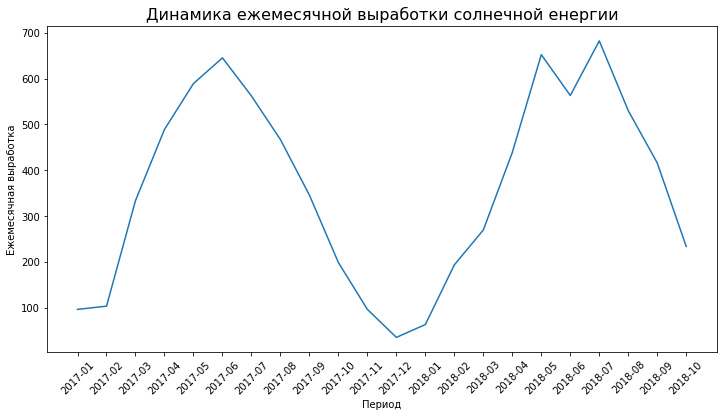

In [9]:
fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(
    data=monthly_power,  
    x='period',
    y='day_power'
   )
lineplot.set_title('Динамика ежемесячной выработки солнечной енергии', fontsize=16)
lineplot.set_xlabel('Период')
lineplot.set_ylabel('Ежемесячная выработка')
plt.xticks(rotation=45)

За период с января по июнь 2017 года наблюдается подъем в выработке солнечной энергии, так как сответствует периоду прироста светового дня, и в июне достигает максимума, так как 22 июня является день летнего солнцестояния - самого длинный световой день. После июня наблюдается спад в ежемесячной выработке солнечной энергии, так как происходит убывание светового дня, и достигает своего минимума в декабре (22 декабря - день зимнего солнцестояния, самый короткий световой день). Для 2018 года наблюдается аналогичная картина, что и для 2017, только в июне наблюдается небольшой провал, и есть два пика в мае и июле.